c:\Users\rajva\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction for Age=55.0 and Income=66000.0 is: yes



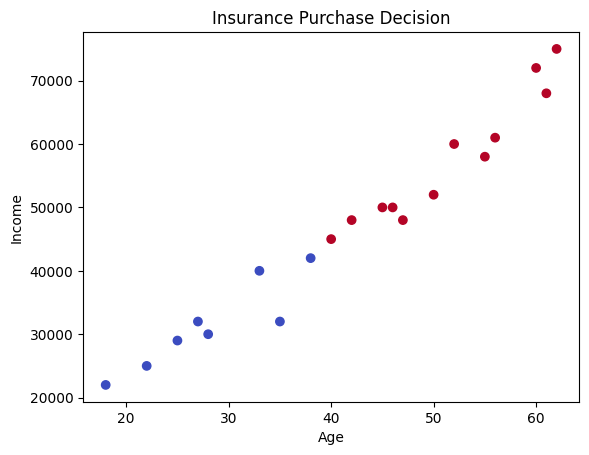

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

data={
    'Age':[22,25,47,52,46,56,55,60,62,61,18,28,27,45,50,33,40,42,38,35],
    'Income':[25000,29000,48000,60000,50000,61000,58000,72000,75000,68000,22000,30000,32000,50000,52000,40000,45000,48000,42000,32000],
    'Bought_Insurance':[0,0,1,1,1,1,1,1,1,1,0,0,0,1,1,0,1,1,0,0]
}

df = pd.DataFrame(data)

x = df[['Age','Income']]
y = df['Bought_Insurance']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train, y_train)

# ---- USER INPUT ----
Age = float(input("Enter Age: "))
Income = float(input("Enter Income: "))

# Correct scaling
user_scaled = scaler.transform([[Age, Income]])

# Prediction
prediction = knn.predict(user_scaled)[0]

result="yes" if prediction==1 else "no"

print(f"\nPrediction for Age={Age} and Income={Income} is: {result}\n")


plt.scatter(df['Age'],df['Income'],c=df['Bought_Insurance'],cmap='coolwarm')
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Insurance Purchase Decision')
plt.show()